In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
estaticos_market = pd.read_csv('estaticos_market.csv')
estaticos_market.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
estaticos_market.shape

(462298, 182)

In [4]:
#remover qualquer dado com mais de 50% de dados faltantes
df = pd.DataFrame(estaticos_market.isna().sum()/estaticos_market.shape[0], columns = ['per_na'])
df_ = df[df['per_na'] > 0.5]
columns_to_drop = list(df_.transpose().columns)
df_mkt_dropped = estaticos_market.drop(columns = columns_to_drop)

## Profiling

In [5]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df_mkt_dropped, minimal=True, title='Profiling',html={'style':{'full_width':True}})
#profile.to_notebook_iframe()
#profile.to_file(output_file="df_mkt_dropped_minimal.html")

In [6]:
columns_to_drop = ['fl_matriz', 'idade_empresa_anos', 'fl_me', 'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda', 'dt_situacao',
                  'fl_st_especial', 'fl_email', 'fl_telefone', 'nm_divisao', 'nm_segmento', 'fl_spa', 'fl_antt',
                  'fl_veiculo', 'fl_optante_simples', 'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo',
                  'fl_optante_simei', 'sg_uf_matriz', 'de_saude_rescencia', 'nu_meses_rescencia', 'fl_simples_irregular',
                  'empsetorcensitariofaixarendapopulacao', 'nm_meso_regiao', 'nm_micro_regiao', 'fl_passivel_iss',
                  'qt_socios', 'qt_socios_pf', 'qt_socios_pj', 'idade_media_socios', 'idade_maxima_socios',
                  'idade_minima_socios', 'qt_socios_st_regular', 'de_faixa_faturamento_estimado', 'vl_faturamento_estimado_aux',
                  'vl_faturamento_estimado_grupo_aux', 'Unnamed: 0', 'de_ramo', 'de_natureza_juridica',
                  'qt_filiais']

### considerações sobre as colunas retiradas

#### fl_matriz : boolean value, true if the CNPJ corresponds to the "matriz".
Parece não relevante para o contexto
#### idade_empresa_anos : numeric value, age of the company.
vou 'idade_emp_cat' no lugar desta
#### fl_me : boolean value, true if the company has the term 'ME' in the end of its legal name.
Parece não relevante para o contexto
#### fl_sa : boolean value, true if the company has the term 'SA' in the end of its legal name.
Parece não relevante para o contexto
#### fl_epp : boolean value, true if the company has the term 'EPP' in the end of its legal name.
Parece não relevante para o contexto
#### fl_mei : boolean value, true if the company has the term 'MEI' in the end of its legal name.
Parece não relevante para o contexto
#### fl_ltda : boolean value, true if the company has the term 'LTDA' in the end of its legal name.
Parece não relevante para o contexto
#### dt_situacao : date when the "de_situacao" was registered by the IRS.
Parece não relevante para o contexto
#### fl_st_especial : boolean value, true if dt_situacao_especial is not null. If it is not null means that some extraordinary situation is identified by the IRS (ESPOLIO DE EMPRESARIO EMPRESA INDIVIDUAL OU EIRELI, FALIDO, EM LIQUIDACAO, LIQUIDACAO JUDICIAL, LIQUIDACAO EXTRA JUDICIAL, REGISTRO NA JUNTA COMERCIAL EM ANDAMENTO, EM LIQUID EXTRA JUDICIAL, RECUPERACAO JUDICIAL, INTERVENCAO)
99,9% é falso
#### fl_email : boolean value, true if the cnpj has an email registered at the IRF database.
Parece não relevante para o contexto
#### fl_telefone : boolean value, true if the company has a phone number registered in IRS database.
Parece não relevante para o contexto
#### nm_divisao : character, name description of the primary economic activity of the company
usar, vai aumentar bastante o tempo de processamento
#### fl_spa : boolean, true if the company has it's own fuel station
99% é falso
#### fl_antt :boolean, true if the company is certified by ANTT for trasnportation purposes
99% é falso
#### fl_veiculo :boolean, true if the company owns at least one vehicle
Parece não relevante para o contexto
#### fl_optante_simples : boolean, true if the company is taxed according to SIMPLES regime
Parece não relevante para o contexto
#### vl_total_veiculos_pesados_grupo : numeric, economic value of the heavy weight vehicles of the economic group of the company
Parece não relevante para o contexto
#### vl_total_veiculos_leves_grupo : numeric, economic value of the light weight vehicles of the economic group of the company
Parece não relevante para o contexto
#### fl_optante_simei : boolean, true if the company is taxed as an MEI - Individual Micro Entrepreneur (Micro Empreendedor Individual)
A 'de_faixa_faturamento_estimado_grupo' ja fornece essa informação
#### sg_uf_matriz :character, state of the main office location
'sg_uf' é suficiente para representar local
#### de_saude_rescencia :character, indicates time of update of the most lagged input of the indicator.
Parece não relevante para o contexto
#### nu_meses_rescencia :character, number of months since the last update of the most lagged input from saude_tributaria
Parece não relevante para o contexto
#### fl_simples_irregular : boolean, true if the company is taxed under the SIMPLES regime and has a impeditive CNAE (economic activities that are not allowed to be taxed according to the simples regime) revenue above the limit of the regime.
99% é falso
#### empsetorcensitariofaixarendapopulacao : numeric, average income from a sample of residents in a census unity (smallest territory area according to IBGE)
Parece não relevante para o contexto
#### nm_meso_regiao :character, name of the meso region where the company is located.
'sg_uf' é suficiente para representar local
#### nm_micro_regiao :character, name of the micro region where the company is located.
'sg_uf' é suficiente para representar local
#### fl_passivel_iss :boolean, true if the company performs any activity that is taxable under ISS - Tax under services.
Parece não relevante para o contexto
#### qt_socios : integer value, quantity of partners/shareholders of the cnpj
Parece não relevante para o contexto
#### qt_socios_pf : integer value, quantity of partners/shareholders of the cnpj that are persons
Parece não relevante para o contexto
#### qt_socios_pj : integer value, quantity of partners/shareholders of the cnpj that are companies
Parece não relevante para o contexto
#### idade_media_socios : numeric value, average age of the partners of the cnpj(considers only the cpf partners)
Parece não relevante para o contexto
#### idade_maxima_socios : same as above but with max metric
Parece não relevante para o contexto
#### idade_minima_socios : same as above but wiht min metric
Parece não relevante para o contexto
#### qt_socios_st_regular : integer value, quantity of partners with regular situation under IRS - Receita Federal
Parece não relevante para o contexto
#### de_faixa_faturamento_estimado : character value, class of the estimated revenue of the company
Muito similar a 'de_faixa_faturamento_estimado_grupo'
#### vl_faturamento_estimado_aux : numeric value, value of the estimated revenue
Optou-se por 'de_faixa_faturamento_estimado_grupo' para representar a renda
#### vl_faturamento_estimado_grupo_aux : numeric value, sum of the estimated revenue for the matrix company and the branches
Optou-se por 'de_faixa_faturamento_estimado_grupo' para representar a renda

In [7]:
df_mkt_dropped_intuition = df_mkt_dropped.drop(columns = columns_to_drop)
df_mkt_dropped_intuition.columns

Index(['id', 'sg_uf', 'natureza_juridica_macro', 'setor', 'idade_emp_cat',
       'fl_rm', 'de_saude_tributaria', 'de_nivel_atividade',
       'de_faixa_faturamento_estimado_grupo'],
      dtype='object')

### descrição das colunas que ficaram
#### sg_uf : character, initials of the name of the state of the company

#### natureza_juridica_macro : a macro legal category for "natureza jurídica".

#### setor :character, economic sector of the company (Industry, Services, Agrobusiness, Etc.)

#### idade_emp_cat : character, age of the company by ranges

#### fl_rm : character, true if the company address is located in an metropolitan area.

#### de_saude_tributaria :character, indicator of health tax status, Green if all tax are OK, Red if none are OK

#### de_nivel_atividade :character, probability of being operating, ALTA high probality, BAIXA, low probality

#### de_faixa_faturamento_estimado_grupo : character value, class of the sum of estimated revenue for the matrix company and branches

In [8]:
df_mkt_dropped_intuition.head()

,id,sg_uf,natureza_juridica_macro,setor,idade_emp_cat,fl_rm,de_saude_tributaria,de_nivel_atividade,de_faixa_faturamento_estimado_grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,RN,ENTIDADES EMPRESARIAIS,CONSTRUÇÃO CIVIL,10 a 15,SIM,VERDE,ALTA,"DE R$ 1.500.000,01 A R$ 4.800.000,00"
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,PI,OUTROS,SERVIÇO,1 a 5,SIM,CINZA,BAIXA,"DE R$ 81.000,01 A R$ 360.000,00"
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,AM,OUTROS,SERVIÇO,5 a 10,SIM,AMARELO,MEDIA,"ATE R$ 81.000,00"
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,AM,OUTROS,SERVIÇO,5 a 10,SIM,AMARELO,MEDIA,"DE R$ 81.000,01 A R$ 360.000,00"
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,RN,OUTROS,SERVIÇO,1 a 5,SIM,VERDE,ALTA,"DE R$ 81.000,01 A R$ 360.000,00"


# Feature Engineering

#### existem variaveis com dados faltantes

In [9]:
df_mkt_dropped_intuition.isna().sum()

id                                         0
sg_uf                                      0
natureza_juridica_macro                    0
setor                                   1927
idade_emp_cat                              0
fl_rm                                      0
de_saude_tributaria                    14851
de_nivel_atividade                     11168
de_faixa_faturamento_estimado_grupo    27513
dtype: int64

#### colocar o que mais tem no lugar dos vazios, tem 0,1% de faltantes

In [10]:
df_mkt_dropped_intuition['setor'].fillna(value='COMERCIO', inplace=True)

#### colocar o que mais tem no lugar dos vazios, tem 3,2% de faltantes


In [11]:
df_mkt_dropped_intuition['de_saude_tributaria'].fillna(value='VERDE', inplace=True)

#### colocar o que mais tem no lugar dos vazios, tem 2,4% de faltantes

In [12]:
df_mkt_dropped_intuition['de_nivel_atividade'].fillna(value='MEDIA', inplace=True)

#### colocar o que mais tem no lugar dos vazios, tem 6% de faltantes

In [13]:
df_mkt_dropped_intuition['de_faixa_faturamento_estimado_grupo'].fillna(value='DE R$ 81.000,01 A R$ 360.000,00', inplace=True)

#### sem dados faltantes

In [14]:
df_mkt_dropped_intuition.isna().sum()

id                                     0
sg_uf                                  0
natureza_juridica_macro                0
setor                                  0
idade_emp_cat                          0
fl_rm                                  0
de_saude_tributaria                    0
de_nivel_atividade                     0
de_faixa_faturamento_estimado_grupo    0
dtype: int64

# ONE HOT ENCODING

In [15]:
df_mkt_sem_id = df_mkt_dropped_intuition.drop(columns = 'id')
df_mkt_sem_id.dtypes

sg_uf                                  object
natureza_juridica_macro                object
setor                                  object
idade_emp_cat                          object
fl_rm                                  object
de_saude_tributaria                    object
de_nivel_atividade                     object
de_faixa_faturamento_estimado_grupo    object
dtype: object

In [16]:
df_mkt_sem_id.shape

(462298, 8)

#### pegar as colunas categoricas, que vai ser transformado em colunas booleanas

In [17]:
categorical_feature_mask = df_mkt_sem_id.dtypes==object
categorical_cols = df_mkt_sem_id.columns[categorical_feature_mask].tolist()
categorical_cols

['sg_uf',
 'natureza_juridica_macro',
 'setor',
 'idade_emp_cat',
 'fl_rm',
 'de_saude_tributaria',
 'de_nivel_atividade',
 'de_faixa_faturamento_estimado_grupo']

In [18]:
mkt_encode = pd.get_dummies(df_mkt_sem_id[categorical_cols])

In [19]:
mkt_encode.shape

(462298, 47)

## PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(0.9)

In [22]:
principalComponents = pca.fit_transform(mkt_encode)

In [23]:
pca.explained_variance_ratio_

array([0.11672844, 0.10563998, 0.09498102, 0.08514531, 0.06906546,
       0.05668344, 0.05242115, 0.0416277 , 0.03902867, 0.03783833,
       0.0371856 , 0.0353611 , 0.03087622, 0.02565609, 0.0222116 ,
       0.02156218, 0.01867042, 0.01689179])

In [24]:
X = pca.transform(mkt_encode)
X.shape

(462298, 18)

## Cluster

In [25]:
from sklearn.cluster import KMeans

In [26]:
number_clusters = range(1,10)

In [27]:
wcss = []

for i in number_clusters:
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares')

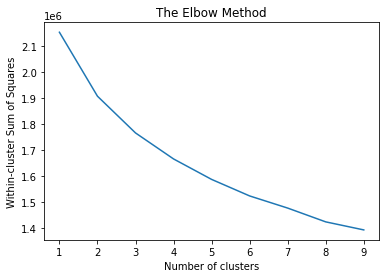

In [28]:
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

#### analisando o grafico 'The Elbow Method' optou-se por 6 clusters

In [29]:
kmeans = KMeans(n_clusters = 6, random_state = 0)

In [30]:
kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [31]:
kmeans.labels_

array([5, 0, 3, ..., 4, 2, 0], dtype=int32)

In [32]:
mkt_encode['k-classes'] = kmeans.labels_
mkt_encode.head()

,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,...,"de_faixa_faturamento_estimado_grupo_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS","de_faixa_faturamento_estimado_grupo_DE R$ 81.000,01 A R$ 360.000,00",k-classes
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,5
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5


In [33]:
#adicionado id
mkt_encode_com_id = mkt_encode
mkt_encode_com_id['id'] = df_mkt_dropped_intuition['id']

In [34]:
mkt_encode_com_id.head()

,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,...,"de_faixa_faturamento_estimado_grupo_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS","de_faixa_faturamento_estimado_grupo_DE R$ 81.000,01 A R$ 360.000,00",k-classes,id
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,5,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [35]:
clusters_total = mkt_encode_com_id['k-classes'].value_counts()
clusters_total

5    86028
4    83013
2    79106
3    77206
1    75289
0    61656
Name: k-classes, dtype: int64

Text(0.5, 1.0, 'Porcentagem de cada cluster')

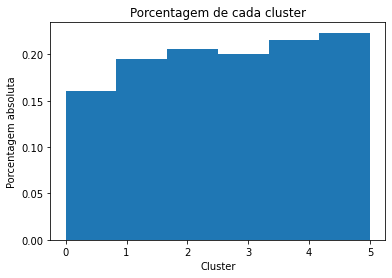

In [36]:
plt.hist(mkt_encode_com_id['k-classes'], density=True, bins=clusters_total.size)  # `density=False` would make counts
plt.ylabel('Porcentagem absoluta')
plt.xlabel('Cluster');
plt.title('Porcentagem de cada cluster')

## Usando PCA para observar os clusters

In [37]:
principalDf = pd.DataFrame(data = principalComponents)

In [38]:
to_plot = principalDf.drop(columns = range(2,X.shape[1]))

In [39]:
to_plot['k-classes'] = mkt_encode_com_id['k-classes']

In [40]:
to_plot = to_plot.rename(columns={0: "principal_comp_0", 1: "principal_comp_1"})

In [41]:
plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams['figure.dpi'] = 200

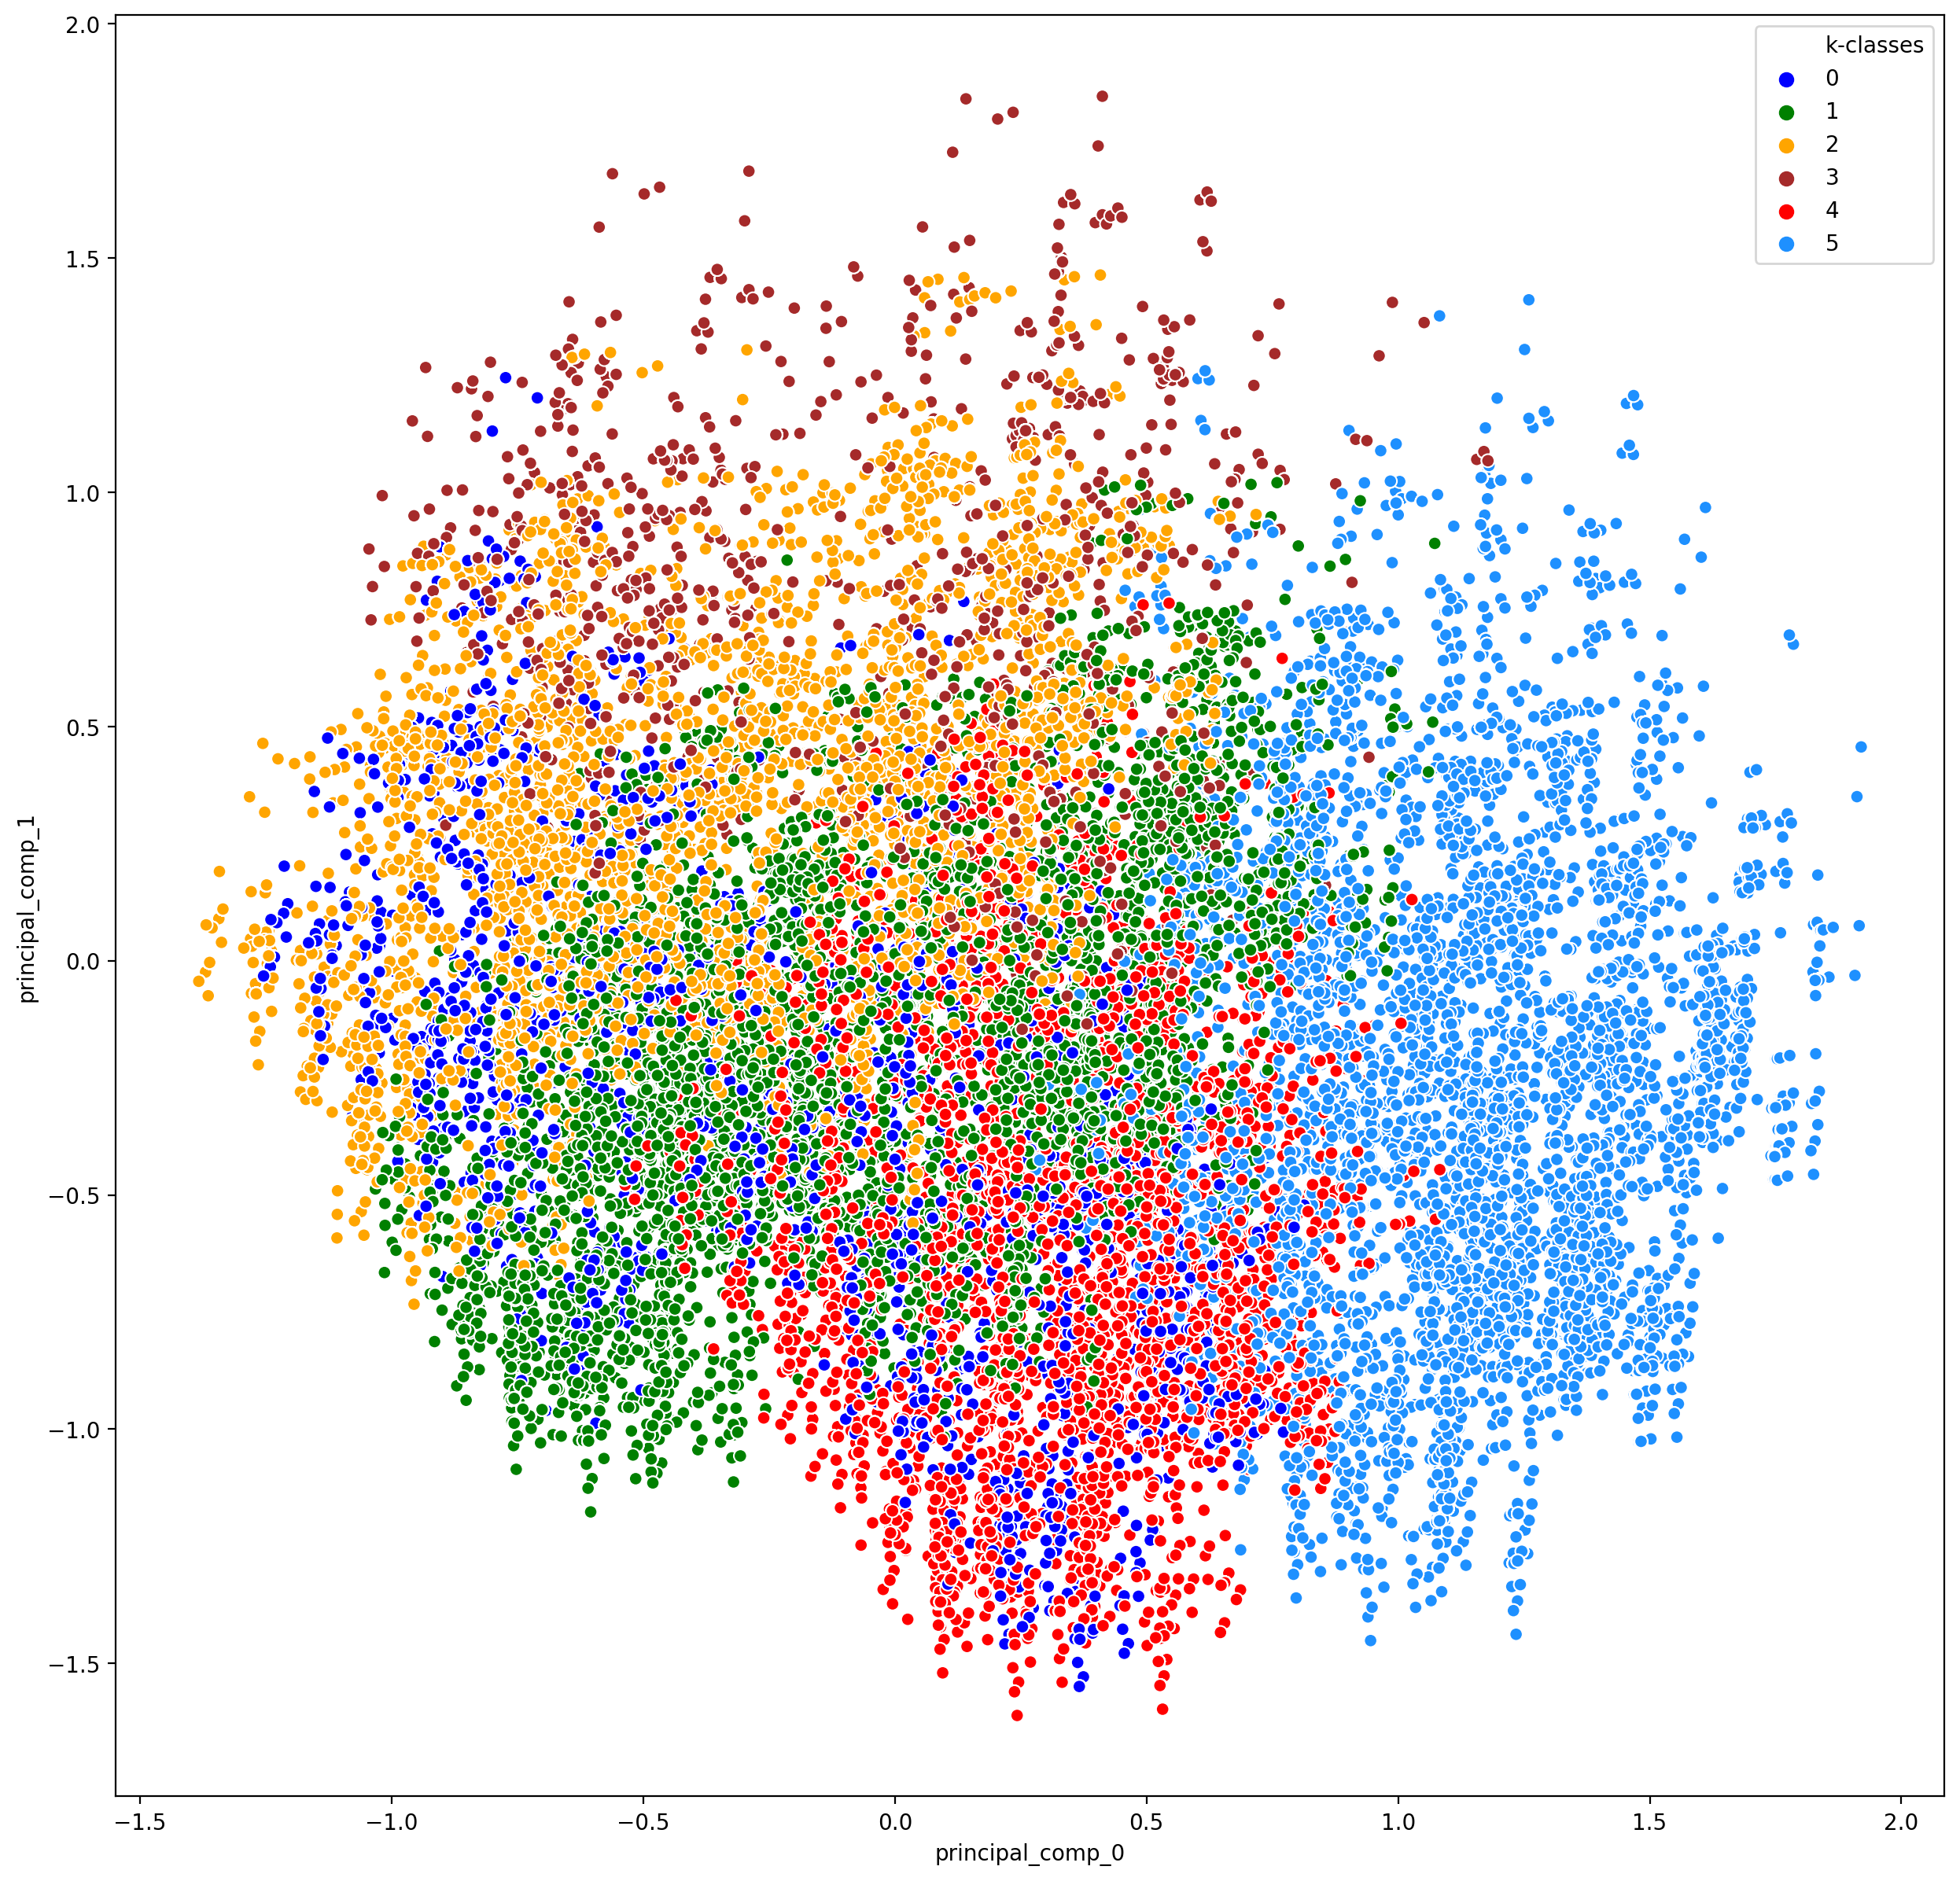

In [42]:
plot = sns.scatterplot(data = to_plot, x='principal_comp_0', y='principal_comp_1', hue = 'k-classes',
                      legend = 'full', palette = ['blue', 'green', 'orange', 'brown', 'red', 'dodgerblue'])

# Analise dos portifolios

In [43]:
df_mkt_dropped_intuition['k-classes'] = mkt_encode_com_id['k-classes']

## Portifolio 1

In [44]:
df_p1 = pd.read_csv('estaticos_portfolio1.csv')

In [45]:
df_cluster_p1 = pd.merge(df_p1, df_mkt_dropped_intuition, on='id', how='left')

In [46]:
df_clusters_value1 = pd.DataFrame(df_cluster_p1['k-classes'].value_counts(normalize=True))
df_clusters_value1

,k-classes
2,0.299099
3,0.207207
0,0.174775
5,0.160360
4,0.144144
1,0.014414


### 29,9% dos clientes do portifolio 1 pertecem ao cluster 2, e 20,7% pertecem ao cluster 3. Logo, priorizar o cluster 2 para expandir o número de clientes é a opção que apresenta melhores resultados pelo historico da empresa

In [47]:
#mercado total somente sem os clientes presentes no portifolio 1
df_mkt_out_port1 = pd.concat([df_cluster_p1[['id', 'k-classes']], mkt_encode[['id', 'k-classes']]]).drop_duplicates(keep=False)

#### lista de recomendação para o portifolio 1

In [48]:
recomendacao1 = df_mkt_out_port1[df_mkt_out_port1['k-classes'] == 2]['id']
recomendacao1.shape

(78940,)

In [49]:
recomendacao1.to_csv ('recomendacao1.csv', index = False, header=True)

## Portifolio 2

In [50]:
df_p2 = pd.read_csv('estaticos_portfolio2.csv')

In [51]:
df_cluster_p2 = pd.merge(df_p2, df_mkt_dropped_intuition, on='id', how='left')

In [52]:
df_clusters_value2 = pd.DataFrame(df_cluster_p2['k-classes'].value_counts(normalize=True))
df_clusters_value2

,k-classes
5,0.542403
1,0.367491
2,0.074205
4,0.010601
0,0.005300


### 54,2% dos clientes do portifolio 2 pertecem ao cluster 5, e 36,7% pertecem ao cluster 1. Logo, priorizar o cluster 5 para expandir o número de clientes é a opção que apresenta melhores resultados pelo historico da empresa

In [53]:
#mercado total somente sem os clientes presentes no portifolio 2
df_mkt_out_port2 = pd.concat([df_cluster_p2[['id', 'k-classes']], mkt_encode[['id', 'k-classes']]]).drop_duplicates(keep=False)

In [54]:
#lista de recomendação para o portifolio 2
recomendacao2 = df_mkt_out_port2[df_mkt_out_port2['k-classes'] == 5]['id']
recomendacao2.shape

(85721,)

In [55]:
recomendacao2.to_csv ('recomendacao2.csv', index = False, header=True)

## Portifolio 3

In [56]:
df_p3 = pd.read_csv('estaticos_portfolio3.csv')

In [57]:
df_cluster_p3 = pd.merge(df_p3, df_mkt_dropped_intuition, on='id', how='left')

In [58]:
df_clusters_value3 = pd.DataFrame(df_cluster_p3['k-classes'].value_counts(normalize=True))
df_clusters_value3

,k-classes
1,0.543396
5,0.422642
4,0.030189
0,0.003774


### 54,3% dos clientes do portifolio 3 pertecem ao cluster 1, e 42,3% pertecem ao cluster 5.Logo, priorizar o cluster 1 para expandir o número de clientes é a opção que apresenta melhores resultados pelo historico da empresa. O cluster 5 tambem pode ser uma boa opção.

In [59]:
#mercado total somente sem os clientes presentes no portifolio 3
df_mkt_out_port3 = pd.concat([df_cluster_p3[['id', 'k-classes']], mkt_encode[['id', 'k-classes']]]).drop_duplicates(keep=False)

In [60]:
#lista de recomendação para o portifolio 3
recomendacao3 = df_mkt_out_port3[df_mkt_out_port3['k-classes'] == 1]['id']
recomendacao3.shape

(75145,)

In [61]:
recomendacao3.to_csv ('recomendacao3.csv', index = False, header=True)